# Lecture 15 – Taking and Filtering Rows

### Spark 010, Spring 2024

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## SAT Data

Today we will be working with a dataset showing aggregated (average) SAT scores by state. This data is from 2014, so the total score is out of 2400 (over three sections each out of 800) instead of 1600.

Definitely, there's a lot of problems with the SATs! We are using as an example of data analysis and not to advocate for their effectiveness!

In [81]:
SATdata = pd.read_csv('data/sat2014-lecture.csv')
SATdata.head(10)

,State,Participation Rate,Critical Reading,Math,Writing
0,Alabama,6.7,547,538,532
1,Alaska,54.2,507,503,475
2,Arizona,36.4,522,525,500
3,Arkansas,4.2,573,571,554
4,California,60.3,498,510,496
5,Colorado,14.3,582,586,567
6,Connecticut,88.4,507,510,508
7,Delaware,100.0,456,459,444
8,District of Columbia,100.0,440,438,431
9,Florida,72.2,491,485,472


We will explore filtering and playing with the data in this data frame in a few different ways. 

First let's remind ourselves we can determine the number of *rows* and *columns* using shape.

In [71]:
num_rows,num_columns = SATdata.shape

"There are " + str(num_rows) + " rows and " + str(num_columns) + " columns."

'There are 51 rows and 5 columns.'

This should make sense, there are 50 states and the District of Columbia.
It would be nice to have a combined score too.

In [82]:
SATdata['Combined Score'] = SATdata['Critical Reading'] + SATdata['Math'] + SATdata['Writing']

Now let's check that we indeed included this new column in the data frame.

In [73]:
SATdata.head(10)

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
0,Alabama,6.7,547,538,532,1617
1,Alaska,54.2,507,503,475,1485
2,Arizona,36.4,522,525,500,1547
3,Arkansas,4.2,573,571,554,1698
4,California,60.3,498,510,496,1504
5,Colorado,14.3,582,586,567,1735
6,Connecticut,88.4,507,510,508,1525
7,Delaware,100.0,456,459,444,1359
8,District of Columbia,100.0,440,438,431,1309
9,Florida,72.2,491,485,472,1448


In [74]:
num_rows,num_columns = SATdata.shape

"There are NOW " + str(num_rows) + " rows and " + str(num_columns) + " columns."

'There are NOW 51 rows and 6 columns.'

## `.iloc`

Sometimes, it is a little tricky to work with a large dataset (even though this specific dataset isn't _that_ large). 

To make it easier for us to understand parts of our data, we may want to just look at certain rows in our table. 

We can do that using `iloc.[indices]`, which takes in a single index or list of indices corresponding to the rows of the table we want to take.

In [28]:
#Return only the values
SATdata.iloc[2] 

State                 Arizona
Participation Rate       36.4
Critical Reading          522
Math                      525
Writing                   500
Combined Score           1547
Name: 2, dtype: object

In [27]:
#Return a single row as a Data Frame
SATdata.iloc[[2]] 

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
2,Arizona,36.4,522,525,500,1547


We can also give a set of values to pull out. 

In [30]:
SATdata.iloc[np.array([1, 4, 3])]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
1,Alaska,54.2,507,503,475,1485
4,California,60.3,498,510,496,1504
3,Arkansas,4.2,573,571,554,1698


We might also only want a specific column, and we can specify the rows and the column in different orders and obtain the same result.

In [38]:
SATdata.iloc[np.array([1,4,3])][['State','Combined Score']]

,State,Combined Score
1,Alaska,1485
4,California,1504
3,Arkansas,1698


In [39]:
SATdata[['State','Combined Score']].iloc[np.array([1,4,3])]

,State,Combined Score
1,Alaska,1485
4,California,1504
3,Arkansas,1698


Recall that `np.arange()` makes it really easy to generate an array of sequential numbers.

In [40]:
np.arange(5)

array([0, 1, 2, 3, 4])

We can pass array ranges into `.iloc()` just as we would manually-created arrays. This is often much easier that manually typing out arrays.

In [43]:
SATdata.iloc[np.arange(5)]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
0,Alabama,6.7,547,538,532,1617
1,Alaska,54.2,507,503,475,1485
2,Arizona,36.4,522,525,500,1547
3,Arkansas,4.2,573,571,554,1698
4,California,60.3,498,510,496,1504


When we combine `sort_values` and `iloc`, we can get some pretty powerful answers.

What are the five states with the highest math scores?

In [51]:
SATdata.sort_values('Math', ascending=False).iloc[np.arange(5)]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
34,North Dakota,2.3,612,620,584,1816
13,Illinois,4.6,599,616,587,1802
15,Iowa,3.1,605,611,578,1794
23,Minnesota,5.9,598,610,578,1786
22,Michigan,3.8,593,610,581,1784


What are the top 8 states in terms of participation?

In [53]:
SATdata.sort_values('Participation Rate', ascending = False).iloc[np.arange(8)]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
7,Delaware,100.0,456,459,444,1359
8,District of Columbia,100.0,440,438,431,1309
12,Idaho,100.0,458,456,450,1364
19,Maine,95.6,467,471,449,1387
6,Connecticut,88.4,507,510,508,1525
21,Massachusetts,84.1,516,531,509,1556
30,New Jersey,79.3,501,523,502,1526
20,Maryland,78.5,492,495,481,1468


Note: `.iloc` works on arrays too, not just tables!

In [54]:
SATdata['State'].iloc[np.arange(5)]

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

In [55]:
SATdata.iloc[np.arange(5)]['State']

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

### Quick Check 1

In [56]:
animals = pd.read_csv('data/animals.csv')
animals.head(10)

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf
5,27.660,114.996,Goat
6,14.831,98.199,Roe_deer
7,1.040,5.500,Guinea_pig
8,4.190,57.998,Vervet
9,0.425,6.400,Chinchilla


Using the `animals` table, fill in the blanks in the code below so that the result is an array containing the names of the five smallest animals by body weight, in increasing order.

In [59]:
animals.sort_values(---).iloc[---] # Replace the blanks with your answer

,brainwt,bodywt,animal
13,0.005,0.14,Lesser_short-tailed-shrew
39,0.010,0.25,Little_brown_bat
19,0.023,0.30,Big_brown_bat
54,0.048,0.33,Musk_shrew
38,0.023,0.40,Mouse


## Booleans

Recall that another useful Python data type is the `bool` or Boolean, whicn only has two possible values: `True` and `False`.

In [61]:
True

True

In [62]:
f = False
f

False

In [63]:
type(True)

bool

In [64]:
type(f)

bool

**Be careful**, because `True` and `False` have special meanings in Python and _cannot_ be used as names. 

In [ ]:
# This doesn't work
3 = 4

In [ ]:
# This also doesn't work
True = 5

There are two special Boolean functions that are useful to filtering:

- And operator: &
- Or operator: |

Both operators take in two Boolean values and return `True` or `False`.

### And Operator

This table shows the result of applying the & (logical AND) operator to all possible combinations of boolean values for A and B. The result of A & B is True only when both A and B are True.

| A     | B     | A & B |
|-------|-------|-------|
| True  | True  | True  |
| True  | False | False |
| False | True  | False |
| False | False | False |







### Or Operator

This table shows the result of applying the | (logical OR) operator to all possible combinations of boolean values for A and B. The result of A | B is True if either A or B (or both) are True. The only case where A | B is False is when both A and B are False.

| A     | B     | A \| B |
|-------|-------|--------|
| True  | True  | True   |
| True  | False | True   |
| False | True  | True   |
| False | False | False  |


## Boolean Filtering

We've already seen how we can use Boolean filtering to extract rows. And we will review some examples of this with our SAT data. 

We will look at different types of filtering based on numerical filtering and then filtering based on strings.

Let's get all the states where the combined score is above 1800.

In [87]:
# Create a boolean mask where True represents rows with a combined SAT score above 1800
above1800 = SATdata['Combined Score'] > 1800

# Apply the mask to the DataFrame to get only the rows where the condition is True
SATdata[above1800]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
13,Illinois,4.6,599,616,587,1802
34,North Dakota,2.3,612,620,584,1816


We sometimes want to have outcomes between two values. Here we can use Boolean OR operator.

In [83]:
# Create a boolean mask for rows with a combined SAT score > 1000 and < 1400
between1000And1400 = (SATdata['Combined Score'] > 1000) & (SATdata['Combined Score'] < 1400)

SATdata[between1000And1400]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
7,Delaware,100.0,456,459,444,1359
8,District of Columbia,100.0,440,438,431,1309
12,Idaho,100.0,458,456,450,1364
19,Maine,95.6,467,471,449,1387


In [95]:
# Create a boolean mask for rows with a combined SAT score < 1500 or > 1800
outside1500To1800 = (SATdata['Combined Score'] < 1500) | (SATdata['Combined Score'] > 1800)

# Apply the mask to the DataFrame to filter rows
SATdata[outside600To1800].head(10)

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
1,Alaska,54.2,507,503,475,1485
7,Delaware,100.0,456,459,444,1359
8,District of Columbia,100.0,440,438,431,1309
9,Florida,72.2,491,485,472,1448
10,Georgia,77.2,488,485,472,1445
11,Hawaii,62.6,484,504,472,1460
12,Idaho,100.0,458,456,450,1364
13,Illinois,4.6,599,616,587,1802
14,Indiana,70.5,497,500,477,1474
19,Maine,95.6,467,471,449,1387


We can also do Boolean Filtering using String operations. 

For example, we can get all the states that contain North.

In [98]:
containsNorth = SATdata['State'].str.contains("North")
SATdata[containsNorth]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
33,North Carolina,63.8,499,507,477,1483
34,North Dakota,2.3,612,620,584,1816


We can have multiple different values to match to if we put then in an array and then use `.isin()`.

In [99]:
deep_south = np.array(['Alabama', 'Georgia', 'Louisiana', 'Mississippi', 'South Carolina'])
inDeepSouth = SATdata['State'].isin(deep_south)

SATdata[inDeepSouth]

,State,Participation Rate,Critical Reading,Math,Writing,Combined Score
0,Alabama,6.7,547,538,532,1617
10,Georgia,77.2,488,485,472,1445
18,Louisiana,4.6,561,556,550,1667
24,Mississippi,3.2,583,566,565,1714
40,South Carolina,64.9,488,490,465,1443


## Remember we can Plot!

**Just for fun:** consider the scatter plot of all states' participation rates and combined SAT scores. Does this scatter plot imply that lower participation _causes_ higher SAT scores? Or what is going on here?

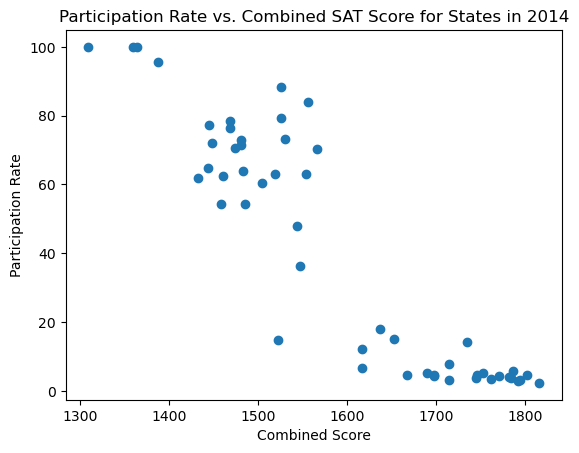

In [104]:
plt.scatter(SATdata['Combined Score'], SATdata['Participation Rate'])

# Adding titles and labels
plt.title('Participation Rate vs. Combined SAT Score for States in 2014')
plt.xlabel('Combined Score')
plt.ylabel('Participation Rate')

# Display the plot
plt.show()

### Quick Check 2

For this Quick Check we will return to the `wnba` data from previous lectures. 

We will only grab a few columns of this. 
- Player: Name of Player.
- PTS: Points Scored
- Pos: Position Played.
- G: Number of Games Played

In [110]:
wnba = pd.read_csv('data/wnba-2020.csv')
wnba = wnba[['Player','PTS','Pos','G']]
wnba.head(10)

,Player,PTS,Pos,G
0,Natalie Achonwa,140,F,18
1,Jaylyn Agnew,15,F,12
2,Bella Alarie,59,C-F,22
3,Kayla Alexander,37,C,16
4,Julie Allemand,188,G,22
5,Lindsay Allen,70,G,21
6,Kristine Anigwe,78,F-C,17
7,Ariel Atkins,326,G,22
8,Seimone Augustus,124,G-F,21
9,Rachel Banham,137,G,20


Fill in the code below so that the result is the average **PTS** scored last season by **forwards** (players whose `Pos` is “F”) who **played 20 or more games (G)** .

In [ ]:
booleanFilter = (----) & (----)

wnba[booleanFilter]['PTS'].mean()